In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

# Download Brent Crude Oil prices (BZ=F)
brent_data = yf.download("BZ=F", start="2018-01-01", end="2024-12-31", interval="1d")

# Reset index to bring Date into a column
brent_data.reset_index(inplace=True)

# Select only Date and Close (or use 'Adj Close' if you want adjusted prices)
brent_clean = brent_data[['Date', 'Close']].rename(columns={'Close': 'brent_crude_price'})

# Save to CSV
brent_clean.to_csv("brent_crude_clean.csv", index=False)

print("Clean Brent Crude Price data saved as brent_crude_clean.csv")

[*********************100%***********************]  1 of 1 completed

Clean Brent Crude Price data saved as brent_crude_clean.csv


In [5]:
import yfinance as yf
import pandas as pd

# Download WTI Crude Oil prices (CL=F)
wti_data = yf.download("CL=F", start="2018-01-01", end="2024-12-31", interval="1d")

# Reset index to bring Date into a column
wti_data.reset_index(inplace=True)

# Select only Date and Close
wti_clean = wti_data[['Date', 'Close']].rename(columns={'Close': 'wti_crude_price'})

# Save to CSV
wti_clean.to_csv("wti_crude_clean.csv", index=False)

print("Clean WTI Crude Price data saved as wti_crude_clean.csv")

[*********************100%***********************]  1 of 1 completed

Clean WTI Crude Price data saved as wti_crude_clean.csv


In [15]:
import yfinance as yf
import pandas as pd

# WTI Crude Oil Futures Ticker
ticker = "CL=F"
start_date = "2018-01-01"
end_date = "2024-12-31"

# Fetch from Yahoo
data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# If data exists, save it
if not data.empty:
    df_wti_eia = data.reset_index()[["Date", "Close"]].rename(columns={"Close": "wti_crude_eia_price"})
    df_wti_eia.to_csv("wti_crude_eia_clean.csv", index=False)
    print("✅ Saved wti_crude_eia_clean.csv with shape:", df_wti_eia.shape)
    print(df_wti_eia.head())
else:
    print("❌ No data returned. Try again or check internet/firewall.")

✅ Saved wti_crude_eia_clean.csv with shape: (1760, 2)
Price        Date wti_crude_eia_price
Ticker                           CL=F
0      2018-01-02           60.369999
1      2018-01-03           61.630001
2      2018-01-04           62.009998
3      2018-01-05           61.439999
4      2018-01-08           61.730000


In [17]:
import yfinance as yf
import pandas as pd

# DXY Index ticker on Yahoo Finance
dxy_data = yf.download("DX-Y.NYB", start="2018-01-01", end="2024-12-31", interval="1d")

# Reset index
dxy_data.reset_index(inplace=True)

# Clean and rename
dxy_clean = dxy_data[['Date', 'Close']].rename(columns={'Close': 'us_dxy_index'})

# Save
dxy_clean.to_csv("us_dxy_index_clean.csv", index=False)

print("✅ Clean US Dollar Index data saved as us_dxy_index_clean.csv")

[*********************100%***********************]  1 of 1 completed

✅ Clean US Dollar Index data saved as us_dxy_index_clean.csv


In [19]:
import requests
import pandas as pd

# Your FRED API Key
api_key = "3d2d1e3d7bb2203260e369a4e6dbddf1"  # Replace with your actual key

# CPI Series ID
series_id = "CPIAUCSL"

# FRED API URL
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"

# Make the request
response = requests.get(url)
data = response.json()

# Process if valid
if "observations" in data:
    df = pd.DataFrame(data["observations"])
    
    # Clean and rename
    df = df[['date', 'value']].rename(columns={'date': 'Date', 'value': 'us_cpi'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['us_cpi'] = pd.to_numeric(df['us_cpi'], errors='coerce')

    # Filter to required date range
    df = df[(df['Date'] >= "2018-01-01") & (df['Date'] <= "2024-12-31")]

    # Save
    df.to_csv("us_cpi_clean.csv", index=False)
    print("✅ CPI data saved as us_cpi_clean.csv")
else:
    print("❌ Failed to fetch CPI data from FRED API.")

✅ CPI data saved as us_cpi_clean.csv


In [21]:
import requests
import pandas as pd

# Your FRED API Key
api_key = "3d2d1e3d7bb2203260e369a4e6dbddf1"  # Replace with your real key

# Fed Funds Rate Series ID
series_id = "FEDFUNDS"

# FRED API Endpoint
url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"

# Fetch data
response = requests.get(url)
data = response.json()

# Process response
if "observations" in data:
    df = pd.DataFrame(data["observations"])
    
    # Clean and rename
    df = df[['date', 'value']].rename(columns={'date': 'Date', 'value': 'us_fed_rate'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['us_fed_rate'] = pd.to_numeric(df['us_fed_rate'], errors='coerce')

    # Filter for synced range
    df = df[(df['Date'] >= "2018-01-01") & (df['Date'] <= "2024-12-31")]

    # Save
    df.to_csv("us_fed_rate_clean.csv", index=False)
    print("✅ Fed Rate data saved as us_fed_rate_clean.csv")
else:
    print("❌ Failed to fetch Fed Rate data from FRED.")

✅ Fed Rate data saved as us_fed_rate_clean.csv


In [25]:
import requests
import pandas as pd

# Your EIA API Key
api_key = "xHA7KFfRqzWHCp1lWY0Mnmrjj1MkXyL5uYWcYais"  # Replace with your actual EIA API key

# OPEC Monthly Crude Production Series ID
series_id = "PET.OPECPE2.M"

# Correct v2 Endpoint for EIA Series Data
url = f"https://api.eia.gov/v2/seriesid/PET.RWTC.D?api_key={api_key}"

# Parameters for the API request
params = {
    "api_key": api_key,
    "start": "2018-01-01",
    "end": "2024-12-31",
    "data": ["value"],
    "frequency": "monthly",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# Make request
response = requests.get(url, params=params)
data = response.json()

# Parse and clean
if response.status_code == 200 and "response" in data and "data" in data["response"]:
    df = pd.DataFrame(data["response"]["data"])
    
    # Retain only date and value
    df = df[['period', 'value']].rename(columns={'period': 'Date', 'value': 'opec_production'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['opec_production'] = pd.to_numeric(df['opec_production'], errors='coerce')

    # Filter for sync range
    df = df[(df['Date'] >= "2018-01-01") & (df['Date'] <= "2024-12-31")]

    # Save to CSV
    df.to_csv("opec_production_clean.csv", index=False)
    print("✅ OPEC production data saved as opec_production_clean.csv")
else:
    print("❌ Failed to fetch OPEC production data. Here's the response:")
    print(response.text)


✅ OPEC production data saved as opec_production_clean.csv


In [37]:
import requests
import pandas as pd

# Replace with your actual EIA API Key
api_key = "xHA7KFfRqzWHCp1lWY0Mnmrjj1MkXyL5uYWcYais"
series_id = "PET.WCESTUS1.W"

# Build URL
url = f"https://api.eia.gov/v2/seriesid/PET.WCESTUS1.W?api_key={api_key}"

# Request data
response = requests.get(url)
data = response.json()

# Process the response
if response.status_code == 200 and "response" in data and "data" in data["response"]:
    df = pd.DataFrame(data["response"]["data"])
    
    # Rename and format
    df = df[['period', 'value']].rename(columns={'period': 'Date', 'value': 'us_crude_inventories'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['us_crude_inventories'] = pd.to_numeric(df['us_crude_inventories'], errors='coerce')
    
    # Filter date range
    df = df[(df['Date'] >= "2018-01-01") & (df['Date'] <= "2024-12-31")]

    # Save to file
    df.to_csv("us_crude_inventories_clean.csv", index=False)
    print("✅ Inventory data saved as us_crude_inventories_clean.csv")

else:
    print("❌ Failed to fetch inventory data. Please check your API key or series ID.")
    print(response.text)

✅ Inventory data saved as us_crude_inventories_clean.csv


In [39]:
import requests
import pandas as pd

# Your EIA API Key
api_key = "xHA7KFfRqzWHCp1lWY0Mnmrjj1MkXyL5uYWcYais"  # Replace with your actual EIA API key

# Series ID for Weekly US Crude Oil Field Production
series_id = "PET.WCRFPUS2.W"

# EIA v2 API Endpoint
url = f"https://api.eia.gov/v2/seriesid/PET.MCRFPUS2.M?api_key={api_key}"

# Parameters
params = {
    "api_key": api_key,
    "start": "2018-01-01",
    "end": "2024-12-31",
    "data": ["value"],
    "frequency": "weekly",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# Make API call
response = requests.get(url, params=params)
data = response.json()

# Parse and clean
if response.status_code == 200 and "response" in data and "data" in data["response"]:
    df = pd.DataFrame(data["response"]["data"])

    # Retain only period and value columns
    df = df[['period', 'value']].rename(columns={'period': 'Date', 'value': 'us_crude_production'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['us_crude_production'] = pd.to_numeric(df['us_crude_production'], errors='coerce')

    # Filter relevant range
    df = df[(df['Date'] >= "2018-01-01") & (df['Date'] <= "2024-12-31")]

    # Save to CSV
    df.to_csv("us_crude_production_clean.csv", index=False)
    print("✅ US crude production data saved as us_crude_production_clean.csv")
else:
    print("❌ Failed to fetch US crude production data. API response:")
    print(response.text)


✅ US crude production data saved as us_crude_production_clean.csv


In [ ]:
pip install requests

In [ ]:
!pip install GoogleNews textblob
!python -m textblob.download_corpora

In [ ]:
!pip install vaderSentiment GoogleNews

In [41]:
import pandas as pd

# Load cleaned datasets
wti = pd.read_csv("wti_crude_clean.csv", parse_dates=["Date"])
brent = pd.read_csv("brent_crude_clean.csv", parse_dates=["Date"])
wti_eia = pd.read_csv("wti_crude_eia_clean.csv", parse_dates=["Date"])
cpi = pd.read_csv("us_cpi_clean.csv", parse_dates=["Date"])
fed = pd.read_csv("us_fed_rate_clean.csv", parse_dates=["Date"])
dxy = pd.read_csv("us_dxy_index_clean.csv", parse_dates=["Date"])
opec = pd.read_csv("opec_production_clean.csv", parse_dates=["Date"])
inv = pd.read_csv("us_crude_inventories_clean.csv", parse_dates=["Date"])
prod = pd.read_csv("us_crude_production_clean.csv", parse_dates=["Date"])
sentiment = pd.read_csv("google_sentiment_clean.csv", parse_dates=["Date"])

# Merge everything on Date using outer join
master_df = wti.copy()
for df in [brent, wti_eia, cpi, fed, dxy, opec, inv, prod, sentiment]:
    master_df = pd.merge(master_df, df, on="Date", how="outer")

# Sort by Date
master_df = master_df.sort_values("Date").reset_index(drop=True)

# Save the final master file
master_df.to_csv("crude_oil_master_final.csv", index=False)
print("✅ Master dataset saved as crude_oil_master_final.csv")

✅ Master dataset saved as crude_oil_master_final.csv


In [43]:
import pandas as pd

# Load current master dataset
df = pd.read_csv("crude_oil_master_final.csv", parse_dates=["Date"])

# Drop row with null Date
df = df[df["Date"].notnull()].copy()

# Sort by Date
df = df.sort_values("Date").reset_index(drop=True)

# Forward-fill known sparse features
fill_columns = [
    'us_cpi', 'us_fed_rate', 'us_crude_production',
    'us_crude_inventories', 'opec_production',
    'wti_crude_price', 'brent_crude_price', 'wti_crude_eia_price',
    'us_dxy_index', 'Google_Sentiment', 'Google_Sentiment_3d'
]

df[fill_columns] = df[fill_columns].fillna(method='ffill').fillna(method='bfill')

# Final save
df.to_csv("crude_oil_master_clean_final.csv", index=False)
print("✅ Final master dataset cleaned and saved as crude_oil_master_clean_final.csv")

✅ Final master dataset cleaned and saved as crude_oil_master_clean_final.csv


/var/folders/8j/pb7f9wf91rq68swpzs9g_b_80000gn/T/ipykernel_62723/4184603603.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fill_columns] = df[fill_columns].fillna(method='ffill').fillna(method='bfill')


In [45]:
# FEATURE ENGINEERING BEGINS

In [49]:
import pandas as pd

# Load the clean master dataset
df = pd.read_csv("crude_oil_master_clean_final.csv", parse_dates=["Date"])

# Create lag-1 features for selected columns
lag_features = [
    "wti_crude_price",
    "brent_crude_price",
    "Google_Sentiment",
    "us_dxy_index"
]

for col in lag_features:
    df[f"{col}_lag1"] = df[col].shift(1)

# Save updated dataset
df.to_csv("crude_oil_master_lag1.csv", index=False)
print("✅ 1-day lag features created and saved to crude_oil_master_lag1.csv")

✅ 1-day lag features created and saved to crude_oil_master_lag1.csv


In [51]:
import pandas as pd

# Load the cleaned master dataset
df = pd.read_csv("crude_oil_master_lag1.csv", parse_dates=["Date"])

# Create percentage change features for selected columns
pct_change_columns = [
    "wti_crude_price",
    "brent_crude_price",
    "Google_Sentiment",
    "us_dxy_index"
]

for col in pct_change_columns:
    df[f"{col}_pct_change_1d"] = df[col].pct_change(1) * 100  # 1-day percent change
    df[f"{col}_pct_change_3d"] = df[col].pct_change(3) * 100  # 3-day percent change
    df[f"{col}_pct_change_7d"] = df[col].pct_change(7) * 100  # 7-day percent change

# Save updated dataset
df.to_csv("crude_oil_master_pct_change.csv", index=False)
print("✅ Percentage change features (1d, 3d, 7d) created and saved to crude_oil_master_pct_change.csv")

✅ Percentage change features (1d, 3d, 7d) created and saved to crude_oil_master_pct_change.csv


In [76]:
import pandas as pd

# Load the dataset
df = pd.read_csv("crude_oil_master_pct_change.csv", parse_dates=["Date"])

# Define columns to apply rolling averages
rolling_columns = [
    "wti_crude_price", 
    "brent_crude_price", 
    "Google_Sentiment", 
    "us_dxy_index"
]

# Calculate rolling averages (7-day and 30-day windows)
for col in rolling_columns:
    df[f"{col}_rolling_7d"] = df[col].rolling(window=7).mean()  # 7-day rolling average
    df[f"{col}_rolling_30d"] = df[col].rolling(window=30).mean()  # 30-day rolling average

# Handle NaN values for the first few rows
# Forward-fill NaN values only for columns where the data is required
df = df.fillna(method='ffill')

# Handle percent change columns, forward-fill where necessary (for pct_change)
pct_change_columns = [
    "wti_crude_price_pct_change_1d", 
    "brent_crude_price_pct_change_1d", 
    "Google_Sentiment_pct_change_1d",
    "us_dxy_index_pct_change_1d"
]

df[pct_change_columns] = df[pct_change_columns].fillna(method='ffill')

# Save the cleaned and updated dataset
df.to_csv("crude_oil_master_clean_rolling_averages_final.csv", index=False)
print("✅ Saved as crude_oil_master_clean_rolling_averages_final.csv")

✅ Saved as crude_oil_master_clean_rolling_averages_final.csv


/var/folders/8j/pb7f9wf91rq68swpzs9g_b_80000gn/T/ipykernel_62723/2357966593.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/var/folders/8j/pb7f9wf91rq68swpzs9g_b_80000gn/T/ipykernel_62723/2357966593.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[pct_change_columns] = df[pct_change_columns].fillna(method='ffill')


In [78]:
import pandas as pd

# Load the cleaned dataset with rolling averages and pct change features
df = pd.read_csv("crude_oil_master_clean_rolling_averages_final.csv", parse_dates=["Date"])

# Define columns to apply volatility (rolling standard deviation)
volatility_columns = [
    "wti_crude_price",
    "brent_crude_price",
    "Google_Sentiment",
    "us_dxy_index"
]

# Create 7-day and 30-day rolling standard deviations (volatility)
for col in volatility_columns:
    df[f"{col}_volatility_7d"] = df[col].rolling(window=7).std()  # 7-day volatility
    df[f"{col}_volatility_30d"] = df[col].rolling(window=30).std()  # 30-day volatility

# Save the updated dataset with volatility features
df.to_csv("crude_oil_master_volatility.csv", index=False)
print("✅ Volatility features (7d, 30d) created and saved to crude_oil_master_volatility.csv")

✅ Volatility features (7d, 30d) created and saved to crude_oil_master_volatility.csv


In [80]:
import pandas as pd

# Load the dataset
df = pd.read_csv("crude_oil_master_volatility.csv", parse_dates=["Date"])

# Define the columns that need volatility calculation
volatility_columns = [
    "wti_crude_price",
    "brent_crude_price",
    "Google_Sentiment",
    "us_dxy_index"
]

# Forward-fill NaN values for volatility columns, starting after the first few rows
# Apply forward fill from row 31 onwards (i.e., 30 days window filled)
for col in volatility_columns:
    df[f"{col}_volatility_7d"] = df[col].rolling(window=7).std()
    df[f"{col}_volatility_30d"] = df[col].rolling(window=30).std()

# Fill NaN values for rows after the first 30 days
df = df.fillna(method='ffill')

# Save the final cleaned dataset with volatility features
df.to_csv("crude_oil_master_volatility_final.csv", index=False)
print("✅ Volatility features cleaned and saved to crude_oil_master_volatility_final.csv")

✅ Volatility features cleaned and saved to crude_oil_master_volatility_final.csv


/var/folders/8j/pb7f9wf91rq68swpzs9g_b_80000gn/T/ipykernel_62723/177203885.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [82]:
import pandas as pd

# Load the dataset with volatility features
df = pd.read_csv("crude_oil_master_volatility_final.csv", parse_dates=["Date"])

# 1. Lagged Volatility Features (1-day, 3-day lag)
lag_volatility_columns = [
    "wti_crude_price_volatility_7d", 
    "brent_crude_price_volatility_7d", 
    "Google_Sentiment_volatility_7d", 
    "us_dxy_index_volatility_7d"
]

for col in lag_volatility_columns:
    df[f"{col}_lag1"] = df[col].shift(1)  # 1-day lag
    df[f"{col}_lag3"] = df[col].shift(3)  # 3-day lag

# 2. Sentiment-Weighted Oil Price Features (Weighted Sentiment)
df['sentiment_adjusted_wti'] = df['wti_crude_price'] * (df['Google_Sentiment_rolling_7d'] / 100)

# 3. Interaction Feature: Oil Price * Sentiment (Shows interaction between these factors)
df['oil_sentiment_interaction'] = df['wti_crude_price'] * df['Google_Sentiment']

# 4. Interaction Feature: Sentiment vs. DXY Index (Shows interaction with US Dollar)
df['sentiment_vs_dxy'] = df['Google_Sentiment'] * df['us_dxy_index']

# Save the final dataset with the advanced features
df.to_csv("crude_oil_master_advanced_features.csv", index=False)
print("✅ Advanced features created and saved to crude_oil_master_advanced_features.csv")

✅ Advanced features created and saved to crude_oil_master_advanced_features.csv


In [84]:
import pandas as pd
df = pd.read_csv("crude_oil_master_advanced_features.csv", parse_dates = ["Date"])
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

wti_crude_price_lag1                     1
brent_crude_price_lag1                   1
Google_Sentiment_lag1                    1
us_dxy_index_lag1                        1
wti_crude_price_pct_change_1d            1
wti_crude_price_pct_change_3d            3
wti_crude_price_pct_change_7d            7
brent_crude_price_pct_change_1d          1
brent_crude_price_pct_change_3d          3
brent_crude_price_pct_change_7d          7
Google_Sentiment_pct_change_1d           1
Google_Sentiment_pct_change_3d           3
Google_Sentiment_pct_change_7d           7
us_dxy_index_pct_change_1d               1
us_dxy_index_pct_change_3d               3
us_dxy_index_pct_change_7d               7
wti_crude_price_rolling_7d               6
wti_crude_price_rolling_30d             29
brent_crude_price_rolling_7d             6
brent_crude_price_rolling_30d           29
Google_Sentiment_rolling_7d              6
Google_Sentiment_rolling_30d            29
us_dxy_index_rolling_7d                  6
us_dxy_inde

In [88]:
import pandas as pd
df = pd.read_csv("crude_oil_master_advanced_features.csv", parse_dates =["Date"])
df = df.fillna(method = 'ffill')
df.to_csv("crude_oil_master_final_clean.csv", index = False)
print("File saved to crude_oil_master_final_clean.csv")

File saved to crude_oil_master_final_clean.csv


/var/folders/8j/pb7f9wf91rq68swpzs9g_b_80000gn/T/ipykernel_62723/1527465304.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill')


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv("crude_oil_master_final_clean_1.csv", parse_dates=["Date"])

# Define the target variable (e.g., 'wti_crude_price')
target_column = 'wti_crude_price'

# Drop the target column and 'Date' column for features
X = df.drop(columns=["Date", target_column])
y = df[target_column]

# Time-based train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Print the shape of the train and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (2045, 53)
Test set size: (512, 53)


In [11]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("crude_oil_master_final_clean_1.csv" , parse_dates =["Date"])
#target variable
target_column = 'wti_crude_price'

#Dropping the target column and 'Date' column for features
X = df.drop(columns =["Date", target_column])
y = df[target_column]
# initialise scaler

scaler = StandardScaler()

#Scale the features
X_scaled = scaler.fit_transform(X)
#Scaled features back to frame

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

#Save Scaled Features
X_scaled_df.to_csv("X_scaled.csv", index = False)
y.to_csv("y_target.csv", index = False)

#print the shape of the scaled data
print(f"scaled feature set size: {X_scaled_df.shape}")

scaled feature set size: (2557, 53)


In [21]:
# Model Training (Random Forest Model)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

#Loading the scaled dataset and target variable
X = pd.read_csv("X_scaled.csv")
y = pd.read_csv("y_target.csv").squeeze()

# train test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Initialising and training the random forest model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

#make prediction
y_pred = rf_model.predict(X_test)

#Evaluate Model
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R^2 Score: {r2:.4f}")

 RMSE: 0.15
 R^2 Score: 0.9994


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
#Model Training with XGBoost
!pip install xgboost

In [16]:
#importing XGBoost
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#load the scaled feature set and target
X = pd.read_csv("X_scaled.csv")
y = pd.read_csv("y_target.csv").squeeze()

#time based train split(80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [18]:
#initialising XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    verbosity = 1
)
xgb_model.fit(X_train, y_train)

print("Model Training Complete")

Model Training Complete


In [41]:
#predict on the test set 
y_pred_xgb = xgb_model.predict(X_test)

#evaluate
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared = False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" XGBoost RMSE : {rmse_xgb: .4f}")
print(f" XGBoost R^2 : {r2_xgb: .4f}")

 XGBoost RMSE :  0.2107
 XGBoost R^2 :  0.9988


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
#Exporting Prediction from both the models
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

# Load datasets
df = pd.read_csv("crude_oil_master_final_clean_1.csv", parse_dates=["Date"])
X = pd.read_csv("X_scaled.csv")
y = pd.read_csv("y_target.csv").squeeze()

# Define time-based test split
train_size = int(len(X) * 0.8)
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]
date_test = df["Date"].iloc[train_size:].reset_index(drop=True)

# Make predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Get top 5 most important features from Random Forest
importances = rf_model.feature_importances_
top5_indices = np.argsort(importances)[-5:][::-1]  # top 5 indices in descending order
top5_features = X.columns[top5_indices]

# Compile output
output_df = pd.DataFrame({
    "Date": date_test,
    "Actual_WTI": y_test.reset_index(drop=True),
    "Predicted_WTI_RF": rf_preds,
    "Predicted_WTI_XGB": xgb_preds
})

# Add top 5 features from X (not original df, as X is scaled)
for feature in top5_features:
    output_df[feature] = X[feature].iloc[train_size:].reset_index(drop=True)

# Save to CSV
output_df.to_csv("xgb_rf_predictions_output.csv", index=False)
print("File saved as 'xgb_rf_predictions_output.csv'")

File saved as 'xgb_rf_predictions_output.csv'


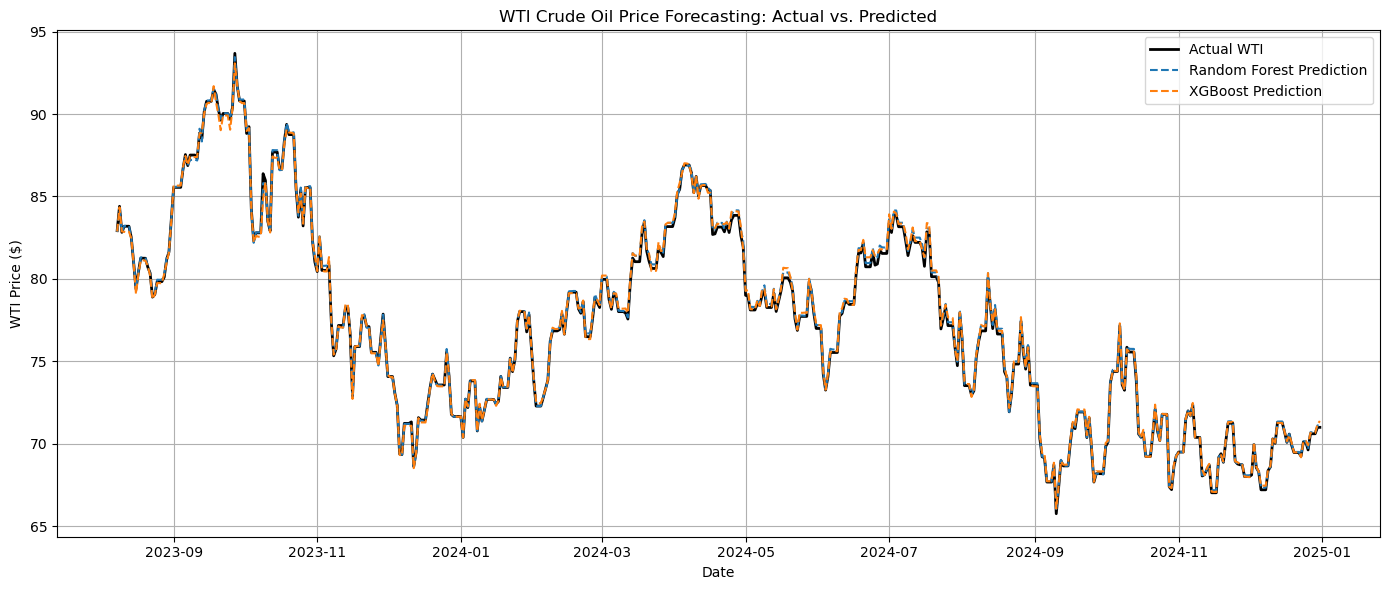

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading exported predictions
df = pd.read_csv("xgb_rf_predictions_output.csv", parse_dates=["Date"])

# Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Actual_WTI"], label="Actual WTI", color='black', linewidth=2)
plt.plot(df["Date"], df["Predicted_WTI_RF"], label="Random Forest Prediction", linestyle='--')
plt.plot(df["Date"], df["Predicted_WTI_XGB"], label="XGBoost Prediction", linestyle='--')

plt.title("WTI Crude Oil Price Forecasting: Actual vs. Predicted")
plt.xlabel("Date")
plt.ylabel("WTI Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
#error columns pre-processing
import pandas as pd
df = pd.read_csv("xgb_rf_predictions_output.csv", parse_dates = ["Date"])
df["RF_Error"] = (df["Actual_WTI"] - df["Predicted_WTI_RF"]).abs()
df["XGB_Error"] = (df["Actual_WTI"] - df["Predicted_WTI_XGB"]).abs()
df.to_csv("xgb_rf_predictions_with_errors.csv", index = False)
print("file updated with error columns for tableau")

file updated with error columns for tableau


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
import pandas as pd

# Use X_train.columns to dynamically get the correct feature names
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
})

# Sort by descending importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Save to CSV
feature_importances.to_csv('feature_importances.csv', index=False)


                                 Feature    Importance
1                    wti_crude_eia_price  7.309859e-01
5                        opec_production  2.604348e-01
0                      brent_crude_price  1.957889e-03
10                  wti_crude_price_lag1  1.200325e-03
26            wti_crude_price_rolling_7d  1.040877e-03
51             oil_sentiment_interaction  9.270006e-04
16         wti_crude_price_pct_change_7d  8.242239e-04
15         wti_crude_price_pct_change_3d  6.459099e-04
14         wti_crude_price_pct_change_1d  5.533749e-04
50                sentiment_adjusted_wti  4.980244e-04
34         wti_crude_price_volatility_7d  4.114805e-04
11                brent_crude_price_lag1  2.716079e-04
37      brent_crude_price_volatility_30d  5.982653e-05
35        wti_crude_price_volatility_30d  3.565000e-05
27           wti_crude_price_rolling_30d  1.632660e-05
28          brent_crude_price_rolling_7d  1.110868e-05
13                     us_dxy_index_lag1  9.656794e-06
41        